In [516]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import defaultdict #lista adjacencia en prim algorithm
import itertools  # all cases for brute force
import csv

In [427]:
class Graph:
    def __init__(self, num_nodes, edge_percentage, max_weight,same_weight_prob):
        self.graph = nx.DiGraph()
        self.generate_random_graph(num_nodes, edge_percentage, max_weight,same_weight_prob)
        
    def get_graph(self):
        return self.graph
    
    def prim_algorithm(adjacency_list, num_nodes):
        visited = [False] * num_nodes
        start_node = random.randint(0, num_nodes - 1)
        visited[start_node] = True
        num_edges = 0
        mst_edges = []

        while num_edges < num_nodes - 1:
            min_weight = float('inf')
            min_edge = None

            for node in range(num_nodes):
                if visited[node]:
                    for neighbor, weight in adjacency_list[node]:
                        if not visited[neighbor] and weight < min_weight:
                            min_weight = weight
                            min_edge = (node, neighbor)

            if min_edge:
                u, v = min_edge
                mst_edges.append((u, v))
                visited[v] = True
                num_edges += 1
            else:
                break

        return mst_edges
    
    def add_edge_with_weights(graph, source_node, target_node, same_weight_prob, max_weight):
        if random.random() <= same_weight_prob:
            weight = random.randint(1, max_weight)
            graph.add_edge(source_node, target_node, weight=weight)
            graph.add_edge(target_node, source_node, weight=weight)
        else:
            weight_source_target = random.randint(1, max_weight)
            weight_target_source = random.randint(1, max_weight)
            graph.add_edge(source_node, target_node, weight=weight_source_target)
            graph.add_edge(target_node, source_node, weight=weight_target_source)

    def generate_random_graph(self, num_nodes, edge_percentage, max_weight,same_weight_prob):
        self.graph.add_nodes_from(range(num_nodes))

        # Generate all possible edges
        all_edges = [(i, j) for i in range(num_nodes) for j in range(num_nodes) if i != j]

        if edge_percentage == 0:
            adjacency_list = defaultdict(list)
            # Generate random weights for each pair of nodes
            for i in range(num_nodes):
                for j in range(i + 1, num_nodes):
                    weight = random.randint(1, max_weight)
                    adjacency_list[i].append((j, weight))
                    adjacency_list[j].append((i, weight))
            # Use Prim's algorithm to build a minimum spanning tree
            mst_edges = self.prim_algorithm(adjacency_list, num_nodes)
            for source_node, target_node in mst_edges:
                self.add_edge_with_weights(self.graph, source_node, target_node, same_weight_prob, max_weight)


        elif edge_percentage == 1:
            # Add all possible edges
            for source_node, target_node in all_edges:
                self.add_edge_with_weights(self.graph, source_node, target_node, same_weight_prob, max_weight)

        else:
            # Calculate the number of edges to retain based on the edge percentage
            num_edges = len(all_edges)
            num_edges_to_retain = int(num_edges * edge_percentage)

            # Randomly select edges to retain
            selected_edges = random.sample(all_edges, num_edges_to_retain)

            # Generate the edges in the graph
            for source_node, target_node in selected_edges:
                self.add_edge_with_weights(self.graph, source_node, target_node, same_weight_prob, max_weight)
        


    def print_graph_data(self):
        # Number of nodes
        num_nodes = self.graph.number_of_nodes()
        print("Number of nodes:", num_nodes)

        # Edge percentage
        total_possible_edges = num_nodes * (num_nodes - 1)
        edge_percentage = self.graph.number_of_edges() / total_possible_edges
        print("Edge percentage:", edge_percentage)

        print("Number of Edges:", self.graph.number_of_edges())
        
        # Adjacency list
        adj_list = [(u, v, attrs["weight"]) for u, v, attrs in self.graph.edges(data=True)]
        print("Adjacency list:")
        print("[" + ", ".join([f"({u}, {v}, Weight: {weight})" for u, v, weight in adj_list]) + "]")

    def draw_graph(self):
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True)

        edge_labels = {}
        for u, v, d in self.graph.edges(data=True):
            if d["weight"] == self.graph.get_edge_data(v, u)["weight"]:
                edge_labels[(u, v)] = f'({d["weight"]})'
            else:
                edge_labels[(u, v)] = f'{u} -> {v} ({d["weight"]})\n{v} --> {u} ({self.graph.get_edge_data(v, u)["weight"]})'
        
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels)
        #[nx.draw_networkx_edge_labels(G,pos,edge_labels={e:i},font_color=cmap[i]) for i,e in enumerate(G.edges())]
        plt.title("Random Graph")
        plt.axis("off")
        plt.show()
        
    def print_adjacency_list_by_node(self):
        print("Adjacency list by node:")
        for node in self.graph.nodes():
            adj_list = [(v, attrs["weight"]) for _, v, attrs in self.graph.out_edges(node, data=True)]
            adj_list_str = " ".join([f"(to {v}, weight {weight})" for v, weight in adj_list])
            print(f"Node {node}: {adj_list_str}")


Number of nodes: 4
Edge percentage: 1.0
Number of Edges: 12
Adjacency list:
[(0, 1, Weight: 58), (0, 2, Weight: 92), (0, 3, Weight: 20), (1, 0, Weight: 58), (1, 2, Weight: 86), (1, 3, Weight: 67), (2, 0, Weight: 73), (2, 1, Weight: 61), (2, 3, Weight: 51), (3, 0, Weight: 20), (3, 1, Weight: 67), (3, 2, Weight: 51)]


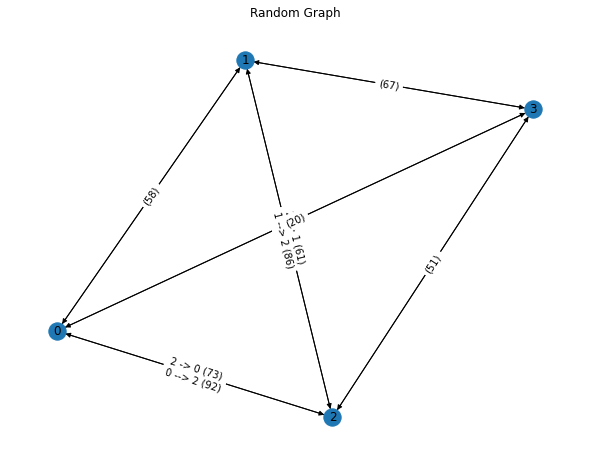

Adjacency list by node:
Node 0: (to 1, weight 58) (to 2, weight 92) (to 3, weight 20)
Node 1: (to 0, weight 58) (to 2, weight 86) (to 3, weight 67)
Node 2: (to 0, weight 73) (to 1, weight 61) (to 3, weight 51)
Node 3: (to 0, weight 20) (to 1, weight 67) (to 2, weight 51)


In [505]:
num_nodes = 4
edge_percentage = 1 #[0=mimino, 0.5 mitad, 1 grafo completo]
max_weight = 100
same_weight_prob=0.8

mi_grafo = Graph(num_nodes, edge_percentage, max_weight,same_weight_prob)

mi_grafo.print_graph_data()
mi_grafo.draw_graph()
mi_grafo.print_adjacency_list_by_node()


In [514]:
def tsp_brute_force(graph):
    # Generate all possible permutations of nodes
    nodes = list(graph.nodes)
    permutations = itertools.permutations(nodes)

    # Initialize variables for the best tour and its cost
    best_tour = None
    best_cost = float('inf')

    # Iterate through all permutations and calculate their costs
    for permutation in permutations:
        tour = list(permutation)
        tour.append(tour[0])  # Add the starting node at the end to complete the tour
        cost = 0

        # Calculate the cost of the current tour
        for i in range(len(tour) - 1):
            current_node = tour[i]
            next_node = tour[i + 1]
            if graph.has_edge(current_node, next_node):
                cost += graph[current_node][next_node]['weight']
            else:
                # If there is no direct edge, consider it as an invalid tour
                cost = float('inf')
                break
        #print(permutation,cost)  ////////////////////////////////////////////////////////ACA VEMOS TODOS LOS CASOS
        # Update the best tour and its cost if the current tour is better
        if cost < best_cost:
            best_tour = tour
            best_cost = cost

    return best_tour, best_cost


In [522]:
algorithms=["Brute Force"]
function_for_algorithms=["tsp_brute_force"]

In [518]:
#"Algorithm","Time Taken", "Best Tour", "Best Cost","Num Nodes","Edge Percentage", "Num Edges", "Adjacency List"
Algorithm  = algorithms[0]
function_for_algorithms[0]
Time Taken  =
Best Tour  =
Best Cost  =
Num Nodes  =
Edge Percentage  =
Num Edges  =
Adjacency List  =

with open('tested'+'.csv', "a", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(new_row)

   


In [515]:
best_tour, best_cost = tsp_brute_force(mi_grafo.get_graph())
print("Best tour:", best_tour)
print("Best cost:", best_cost)

Best tour: [0, 3, 2, 1, 0]
Best cost: 190


In [508]:
def tsp_nearest_neighbor(graph):
    unvisited = set(graph.nodes)  # Set of unvisited nodes
    start_node = list(unvisited)[0]  # Select a random starting node
    current_node = start_node
    tour = [current_node]  # The final tour
    total_distance = 0

    unvisited.remove(current_node)

    while unvisited:
        nearest_neighbor = None
        min_distance = float('inf')

        for neighbor in graph.neighbors(current_node):
            if neighbor in unvisited:
                distance = graph[current_node][neighbor]['weight']
                if distance < min_distance:
                    min_distance = distance
                    nearest_neighbor = neighbor

        if nearest_neighbor is None:
            # If there are no unvisited neighbors, return to the starting node
            tour.append(start_node)
            total_distance += graph[current_node][start_node]['weight']
            current_node = start_node
        else:
            # Visit the nearest unvisited neighbor
            tour.append(nearest_neighbor)
            total_distance += min_distance
            current_node = nearest_neighbor
            unvisited.remove(current_node)

    return tour, total_distance



In [509]:
best_tour, best_cost = tsp_nearest_neighbor(mi_grafo.get_graph())
print("Best tour:", best_tour)
print("Best cost:", best_cost)

Best tour: [0, 3, 2, 1]
Best cost: 132


In [470]:
def tsp_nearest_neighbor(graph):
    num_nodes = graph.number_of_nodes()
    visited = [False] * num_nodes
    tour = []
    
    # Start from the first node
    current_node = 0
    tour.append(current_node)
    visited[current_node] = True
    
    while len(tour) < num_nodes:
        nearest_node = None
        nearest_distance = float('inf')
        
        # Find the nearest unvisited node
        for neighbor in graph.neighbors(current_node):
            if not visited[neighbor] and graph.has_edge(current_node, neighbor):
                distance = graph[current_node][neighbor]['weight']
                if distance < nearest_distance:
                    nearest_distance = distance
                    nearest_node = neighbor
        
        # If no unvisited neighbors found, break the loop
        if nearest_node is None:
            break
        
        # Move to the nearest node
        current_node = nearest_node
        tour.append(current_node)
        visited[current_node] = True
    
    return tour


In [471]:
#pos = {node: (random.uniform(0, 1), random.uniform(0, 1)) for node in graph.nodes()}
# Calculate TSP tour using nearest neighbor algorithm
tour = tsp_nearest_neighbor(mi_grafo.get_graph())

# Plot the TSP tour
# nx.draw(graph, pos, with_labels=True, node_color='lightblue')
# nx.draw_networkx_edges(graph, pos, edgelist=[(tour[i], tour[i+1]) for i in range(len(tour)-1)], width=2, edge_color='red')
# nx.draw_networkx_edges(graph, pos, edgelist=[(tour[-1], tour[0])], width=2, edge_color='red')
# plt.show()

print("TSP Tour:", tour)

TSP Tour: [0, 3, 1, 2]


Multiple random starts: Run the nearest neighbor algorithm multiple times with different starting cities and choose the tour with the shortest total distance.

 iterative improvement: Apply local search techniques like 2-opt or 3-opt to the tour obtained from the nearest neighbor algorithm to further optimize it.

Lin-Kernighan heuristic: Use advanced heuristics like the Lin-Kernighan heuristic, which combines the nearest neighbor algorithm with a series of local optimizations to find better solutions.

In [489]:
def tsp_nearest_neighbor_mrs(graph, num_starts=10):
    num_nodes = graph.number_of_nodes()
    best_tour = None
    best_tour_length = float('inf')

    for _ in range(num_starts):
        start_node = random.choice(list(graph.nodes()))
        visited = [False] * num_nodes
        tour = []

        # Start from the randomly chosen start node
        current_node = start_node
        tour.append(current_node)
        visited[current_node] = True

        while len(tour) < num_nodes:
            nearest_node = None
            nearest_distance = float('inf')

            # Find the nearest unvisited node with a directed edge
            for neighbor in graph.neighbors(current_node):
                if not visited[neighbor] and graph.has_edge(current_node, neighbor):
                    distance = graph[current_node][neighbor]['weight']
                    if distance < nearest_distance:
                        nearest_distance = distance
                        nearest_node = neighbor

            # If no unvisited neighbors found, break the loop
            if nearest_node is None:
                break

            # Move to the nearest node
            current_node = nearest_node
            tour.append(current_node)
            visited[current_node] = True

        # Calculate the length of the current tour
        tour_length = sum(graph[tour[i]][tour[i + 1]]['weight'] for i in range(num_nodes - 1))
        tour_length += graph[tour[-1]][tour[0]]['weight']

        # Update the best tour if the current tour is shorter
        if tour_length < best_tour_length:
            best_tour = tour
            best_tour_length = tour_length

    return best_tour


In [490]:
tour = tsp_nearest_neighbor_mrs(mi_grafo.get_graph())
print("TSP Tour:", tour)

TSP Tour: [1, 2, 0, 3]


Let's consider an example to illustrate this. Suppose we have a tour [A, B, C, D, E] where A, B, C, D, and E are nodes in the graph. Swapping two edges means selecting two consecutive edges in the tour, such as (A, B) and (C, D), and exchanging their positions to create a new tour. In this case, the new tour would be [A, C, D, B, E]. By performing this swap, we have modified the tour by exchanging the edges (A, B) and (C, D).

The iterative improvement step evaluates various combinations of edge swaps to see if they can result in a shorter tour. The algorithm considers different pairs of consecutive edges in the tour and checks if exchanging them leads to a shorter tour length. If a shorter tour is found, the swap is performed, and the process continues.

The goal of swapping edges is to explore local modifications to the tour and potentially improve its length. By systematically considering different edge swaps and evaluating their impact on the tour length, the algorithm iteratively searches for better solutions.

In [497]:
def tsp_nearest_neighbor_ii(graph):
    n = len(graph)
    best_tour = None
    best_distance = float('inf')
    
    for start_node in range(n):
        unvisited = set(range(n))
        tour = [start_node]
        current_node = start_node
        total_distance = 0
        
        unvisited.remove(start_node)
        
        while unvisited:
            nearest_neighbor = None
            nearest_distance = float('inf')
            
            for neighbor in unvisited:
                if graph[current_node][neighbor] < nearest_distance:
                    nearest_neighbor = neighbor
                    nearest_distance = graph[current_node][neighbor]
            
            if nearest_neighbor is None:
                break  # No valid neighbor found
            
            tour.append(nearest_neighbor)
            total_distance += nearest_distance
            current_node = nearest_neighbor
            unvisited.remove(nearest_neighbor)
        
        # Add distance from the last node to the start node, if it exists
        if start_node in unvisited:
            total_distance += graph[current_node][start_node]
        
        if total_distance < best_distance:
            best_distance = total_distance
            best_tour = tour
    
    return best_tour, best_distance


In [494]:
# Calculate TSP tour using nearest neighbor algorithm
#tour = tsp_nearest_neighbor_ii(graph, num_iterations=100)
tour = tsp_nearest_neighbor_ii(mi_grafo.get_graph(), num_iterations=100)
# Plot the TSP tour
# nx.draw(graph, pos, with_labels=True, node_color='lightblue')
# nx.draw_networkx_edges(graph, pos, edgelist=[(tour[i], tour[i+1]) for i in range(len(tour)-1)], width=2, edge_color='red')
# nx.draw_networkx_edges(graph, pos, edgelist=[(tour[-1], tour[0])], width=2, edge_color='red')
# plt.show()

print("TSP Tour:", tour)

KeyError: 0

In [495]:
def tsp_nearest_neighbor(graph):
    num_nodes = graph.number_of_nodes()
    visited = [False] * num_nodes
    tour = []
    
    # Start from the first node
    current_node = 0
    tour.append(current_node)
    visited[current_node] = True
    
    while len(tour) < num_nodes:
        nearest_node = None
        nearest_distance = float('inf')
        
        # Find the nearest unvisited node with a directed edge
        for neighbor in graph.successors(current_node):
            if not visited[neighbor]:
                distance = graph[current_node][neighbor]['weight']
                if distance < nearest_distance:
                    nearest_distance = distance
                    nearest_node = neighbor
        
        # If no unvisited neighbors found, break the loop
        if nearest_node is None:
            break
        
        # Move to the nearest node
        current_node = nearest_node
        tour.append(current_node)
        visited[current_node] = True
    
    return tour


def tsp_lin_kernighan(graph, num_iterations=100):
    num_nodes = graph.number_of_nodes()
    
    # Calculate initial tour using nearest neighbor algorithm
    tour = tsp_nearest_neighbor(graph)
    
    # Iterative Improvement using Lin-Kernighan heuristic
    for _ in range(num_iterations):
        best_tour = tour
        best_tour_length = calculate_tour_length(graph, tour)
        
        # Perform Lin-Kernighan swaps to try improving the tour
        for i in range(num_nodes):
            for j in range(i + 2, num_nodes):
                new_tour = perform_lin_kernighan_swap(graph, tour, i, j)
                new_tour_length = calculate_tour_length(graph, new_tour)
                
                if new_tour_length < best_tour_length:
                    best_tour = new_tour
                    best_tour_length = new_tour_length
        
        # Update the tour with the best found in this iteration
        tour = best_tour
    
    return tour

def perform_lin_kernighan_swap(graph, tour, i, j):
    num_nodes = graph.number_of_nodes()
    new_tour = tour[:i+1] + tour[i+1:j+1][::-1] + tour[j+1:] + [tour[i]]
    return new_tour

def calculate_tour_length(graph, tour):
    tour_length = 0
    
    for i in range(len(tour) - 1):
        node1 = tour[i]
        node2 = tour[i + 1]
        tour_length += graph[node1][node2]['weight']
    
    tour_length += graph[tour[-1]][tour[0]]['weight']
    
    return tour_length




In [496]:
# Calculate TSP tour using Lin-Kernighan heuristic
tour = tsp_lin_kernighan(mi_grafo.get_graph(), num_iterations=100)

print("TSP Tour:", tour)

KeyError: 0